$\alpha$와 $\beta$의 값이 같다. (인라인 수식)

$$ \alpha = \beta $$

### 최적화 문제
- 데이터 분석의 최종 단계는 가장 적합한 숫자를 찾아내는 최적화 단계가 된다.
- 함수 f의 값을 최대화 혹은 최소화 하는 변수 x의 값 x*를 찾는 것.

$$ x^* = arg_xmax f(x) $$

- 이 값 x*를 최적화 문제의 해(solution)라고 한다.
- 이 때 최소화하려는 함수 $\ f(x) $ 를 목적함수라고 한다. (또는 비용함수, 손실함수, 오차함수)

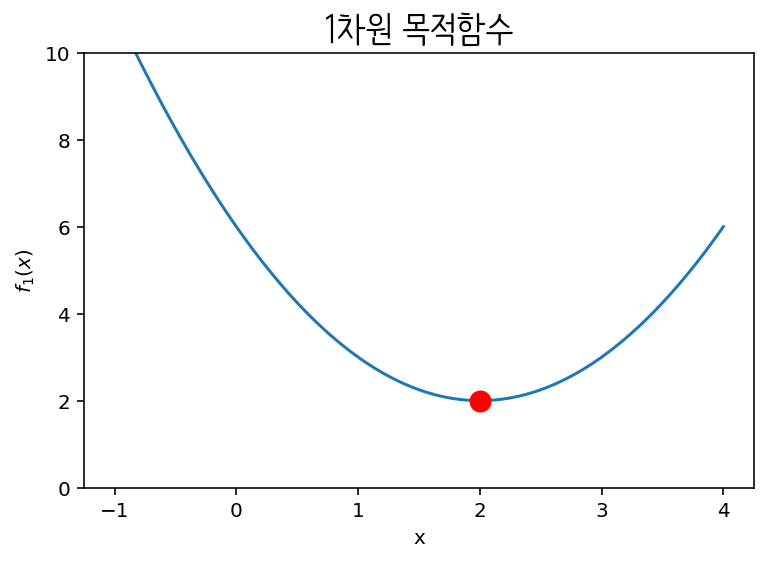

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

data = np.random.randint(-100, 100, 50).cumsum()
path = 'C:\\Users\\LG\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenR.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

def f1(x):
    return (x-2)**2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize = 10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수", fontproperties=fontprop)
plt.show()

### SciPy를 이용한 최적화

- 사이파이(SciPy)의 optimize 서브 패키지는  최적화 명령 minimize()를 제공한다. 세부적인 알고리즘은 method 인수로 선택할 수 있다.
- 디폴트 알고리즘은 BFGS 방법이다. (준 뉴턴 방법)
- 최적화할 함수와 최적화를 시작할 초깃값을 인수로 받고, 선택적으로 그레디언트 벡터를 출력하는 함수를 입력받기도 한다.

    - x : 최적화 해
    - success : 최적화에 성공하면 True 반환
    - status : 종료 상태. 최적화에 성공하면 0 반환
    - message : 메시지 문자열
    - fun : x 위치에서의 함수의 값
    - jac : x 위치에서의 자코비안(그레디언트) 벡터의 값 (False인 경우 성공한 지점에서의 그레디언트 벡터 나옴)
    - hess_inv : x 위치에서의 헤시안 행렬의 역행렬의 값
    - nfev : 목적함수 호출 함수(실행 횟수), number of function evaluation
    - njev : 자코비안 계산 횟수, number of jacobian evaluation
    - nhev : 헤시안 계산 횟수, number of hassian evaluation
    - nit : x 이동 횟수

In [8]:
x0 = 2.0 #초깃값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.])


#### 결과
- fun: 2.0
- hess_inv: array([[1]])
- jac: array([0.])
- message: 'Optimization terminated successfully.'
- nfev: 2
- nit: 0
- njev: 1
- status: 0
- success: True
- x: array([2.])

### 함수의 도함수를 직접 계산해서 인수로 넣어주기

In [10]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2*(x-2)


result = sp.optimize.minimize(f1, x0, jac = f1p)
print(result)

      fun: 2.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 1
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.])


#### 결과

- fun: 2.0
- hess_inv: array([[1]])
- jac: array([0.])
- message: 'Optimization terminated successfully.'
- nfev: 1
- nit: 0
- njev: 1
- status: 0
- success: True
- x: array([2.])

- 도함수를 직접 지정해 주었을 때, 그렇지 않았을 때보다 nfev, 즉 함수 호출 횟수가 2에서 1로 줄어들었음을 알 수 있다.
- 본래에는 SciPy는 SymPy처럼 도함수를 구할 수 없기 때문에 수치미분을 하기 때문.
- 그치만 내가 기대했던 것 만큼 큰 차이가 아니다. 본래에는 도함수를 지정하지 않았을 때 nfev가 9가 나올 줄 알았는데..

### 다변수 함수를 최적화하는 경우

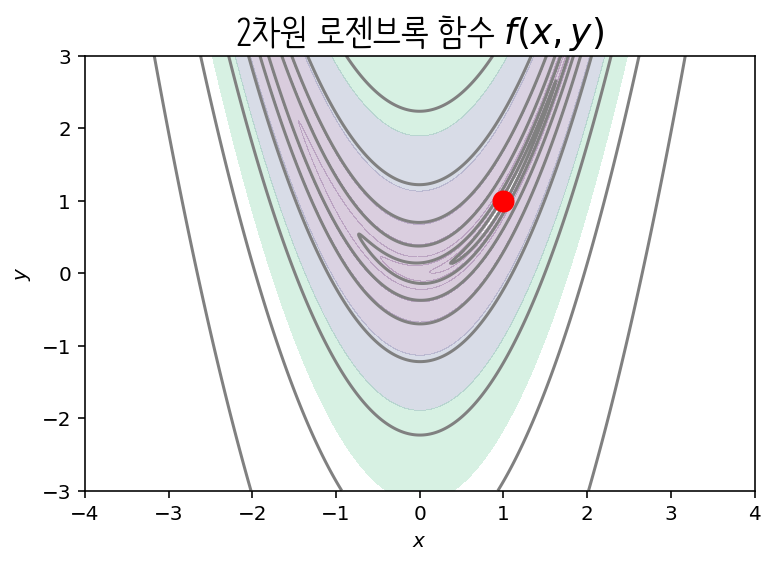

In [14]:
def f2(x, y):
    return (1-x)**2 + 100.0*(y-x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha = 0.2, levels = levels)
plt.contour(X, Y, Z, colors="gray",
           levels = [0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize = 10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$", fontproperties = fontprop)
plt.show()

In [17]:
#2차원 목적함수 재정의(벡터 입력을 받도록)

def f2(x):
    return (1-x[0])**2 + 100.0*(x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 1.2214840709227143e-11
 hess_inv: array([[0.50957128, 1.01994294],
       [1.01994294, 2.04655375]])
      jac: array([ 9.65451242e-05, -4.63433765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 321
      nit: 57
     njev: 103
   status: 2
  success: False
        x: array([0.99999745, 0.99999466])


#### 결과

- 결과를 보면 success가 False이다.
- 그 이유는 minimize 함수는 연산을 무한정 기다려주지 않기 때문.
- 이 함수는 수치미분을 하다 보면 진동(oscillation)이 발생한다. 이게 최대 경사법의 문제 중 하나.(1. stepsize 문제, 2. 진동 문제)
    - fun: 1.2214840709227143e-11
    - hess_inv: array([[0.50957128, 1.01994294],
       [1.01994294, 2.04655375]])
    - jac: array([ 9.65451242e-05, -4.63433765e-05])
    - message: 'Desired error not necessarily achieved due to precision loss.'
    - nfev: 321
    - nit: 57
    - njev: 103
    - status: 2
    - success: False
    - x: array([0.99999745, 0.99999466])
- 이 문제를 초기점을 변경해보거나 그레디언트 벡터 함수를 직접 구현해 jac인수로 주는 방법 등으로 해결할 수 있다. (계산 속도 향상)
   

In [23]:
def f2g(x):
    return np.array((2.0*(x[0]-1) - 400.0*x[0]*(x[1]-x[0]**2), 200.0*(x[1]-x[0]**2)))

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0, jac = f2g)
print(result)

      fun: 1.1490356198637715e-16
 hess_inv: array([[0.49933682, 0.99872978],
       [0.99872978, 2.00252814]])
      jac: array([ 4.29304940e-07, -2.14157247e-07])
  message: 'Optimization terminated successfully.'
     nfev: 73
      nit: 56
     njev: 73
   status: 0
  success: True
        x: array([1., 1.])


#### nfev(numver of f evaluation, f함수 계산횟수) 321번(실패)에서 -> 73번(성공)